In [1]:
# Install hmmlearn if it's not already installed in Colab
!pip install hmmlearn matplotlib numpy scikit-learn

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hmmlearn for HMM implementation
from hmmlearn import hmm

# Scikit-learn for potential data generation/preprocessing (though less common with HMMs)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"NumPy Version: {np.__version__}")

NumPy Version: 2.0.2


### Part 1: Understanding HMM Components and a Simple Example

Let's start by defining the core components of an HMM and working through a very simple, conceptual example (like the "weather and umbrella" problem) to solidify understanding.

An HMM is defined by:
1.  **N (Number of Hidden States):** The number of distinct hidden states.
2.  **M (Number of Observable Symbols):** The number of distinct observation symbols possible in each state.
3.  **$\pi$ (Initial State Probabilities):** The probability distribution over the initial hidden states. $\pi_i = P(q_1 = S_i)$.
4.  **A (Transition Probabilities):** The probability of transitioning from one hidden state to another. $A_{ij} = P(q_{t+1} = S_j | q_t = S_i)$.
5.  **B (Emission Probabilities):** The probability of observing a particular symbol given a hidden state. $B_{jk} = P(O_t = V_k | q_t = S_j)$.

**Example:** "Weather and Umbrella"
* **Hidden States (Q):** {Sunny, Rainy}
* **Observations (V):** {Walk, Shop, Clean} (Activities based on weather)

**Tasks:**
* Define the HMM parameters ($\pi$, A, B) for a toy problem.
* Manually trace the probability of a short observation sequence given a known path of hidden states.
* Manually calculate the likelihood of a single observation sequence using simple direct calculation (without dynamic programming yet).

##  1. Hidden States and Observations

- **Hidden States**: `Sunny`, `Rainy`  
- **Observations**: `Walk`, `Shop`, `Clean`

- Number of Hidden States $N = 2$  
- Number of Observable Symbols $M = 3$



##  2. HMM Parameters (Defined Conceptually)

### Initial State Probabilities ($\pi$):

$P(q_1 = \text{Sunny}) = 0.6$, $P(q_1 = \text{Rainy}) = 0.4$

$$
\pi = [0.6, 0.4]
$$



### Transition Probabilities (A):

$A[i, j] = P(q_{t+1} = j \mid q_t = i)$

$$
A =
\begin{bmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{bmatrix}
$$

- $P(\text{Sunny} \rightarrow \text{Sunny}) = 0.7$  
- $P(\text{Sunny} \rightarrow \text{Rainy}) = 0.3$  
- $P(\text{Rainy} \rightarrow \text{Sunny}) = 0.4$  
- $P(\text{Rainy} \rightarrow \text{Rainy}) = 0.6$



###  Emission Probabilities (B):

$B[j, k] = P(o_k \mid q_j)$

$$
B =
\begin{bmatrix}
0.5 & 0.3 & 0.2 \\
0.1 & 0.4 & 0.5
\end{bmatrix}
$$

- $P(\text{Walk} \mid \text{Sunny}) = 0.5$  
- $P(\text{Shop} \mid \text{Sunny}) = 0.3$  
- $P(\text{Clean} \mid \text{Sunny}) = 0.2$  
- $P(\text{Walk} \mid \text{Rainy}) = 0.1$  
- $P(\text{Shop} \mid \text{Rainy}) = 0.4$  
- $P(\text{Clean} \mid \text{Rainy}) = 0.5$


## 3. Manual Joint Probability Calculation

### Observation sequence: `['Walk', 'Shop', 'Clean']`
### Hidden path (known): `['Sunny', 'Sunny', 'Rainy']`

We calculate the joint probability $P(O, Q)$ using:

$$
P(O, Q) = P(q_1) \cdot P(o_1 \mid q_1) \cdot P(q_2 \mid q_1) \cdot P(o_2 \mid q_2) \cdot P(q_3 \mid q_2) \cdot P(o_3 \mid q_3)
$$

Step-by-step:

- $P(q_1 = \text{Sunny}) = 0.6$  
- $P(o_1 = \text{Walk} \mid \text{Sunny}) = 0.5$  
- $P(q_2 = \text{Sunny} \mid \text{Sunny}) = 0.7$  
- $P(o_2 = \text{Shop} \mid \text{Sunny}) = 0.3$  
- $P(q_3 = \text{Rainy} \mid \text{Sunny}) = 0.3$  
- $P(o_3 = \text{Clean} \mid \text{Rainy}) = 0.5$

$$
P(O, Q) = 0.6 \cdot 0.5 \cdot 0.7 \cdot 0.3 \cdot 0.3 \cdot 0.5 = \boxed{0.00945}
$$



## 4. Manual Likelihood Calculation $P(O)$ Without Dynamic Programming

Let observation sequence be: `['Walk', 'Shop']`  
We compute total probability by summing over **all possible hidden state sequences**:

$$
P(O) = \sum_Q P(O, Q)
$$

All possible hidden paths of length 2:

- **Sunny → Sunny**  
  $P = 0.6 \cdot 0.5 \cdot 0.7 \cdot 0.3 = 0.06300$

- **Sunny → Rainy**  
  $P = 0.6 \cdot 0.5 \cdot 0.3 \cdot 0.4 = 0.03600$

- **Rainy → Sunny**  
  $P = 0.4 \cdot 0.1 \cdot 0.4 \cdot 0.3 = 0.00480$

- **Rainy → Rainy**  
  $P = 0.4 \cdot 0.1 \cdot 0.6 \cdot 0.4 = 0.00960$



### Total Likelihood:

$$
P(O = [\text{Walk}, \text{Shop}]) = 0.063 + 0.036 + 0.0048 + 0.0096 = \boxed{0.1134}
$$


In [3]:
# Define Hidden States and Observations
hidden_states = ['Sunny', 'Rainy']
observations = ['Walk', 'Shop', 'Clean']

# Number of hidden states (N) and observable symbols (M)
N = len(hidden_states)
M = len(observations)

print(f"Hidden States: {hidden_states}")
print(f"Observations: {observations}")
print(f"Number of Hidden States (N): {N}")
print(f"Number of Observable Symbols (M): {M}")

# 1. Define HMM Parameters (Conceptual values for demonstration)
# Initial State Probabilities (pi)
# P(q1 = Sunny) = 0.6, P(q1 = Rainy) = 0.4
pi = np.array([0.6, 0.4])

# Transition Probabilities (A)
# A[i, j] = P(next_state=j | current_state=i)
#         Sunny   Rainy
# Sunny [[0.7    0.3  ],
# Rainy  [0.4    0.6  ]]
A = np.array([
    [0.7, 0.3], # Sunny -> Sunny, Sunny -> Rainy
    [0.4, 0.6]  # Rainy -> Sunny, Rainy -> Rainy
])

# Emission Probabilities (B)
# B[j, k] = P(observation=k | hidden_state=j)
#          Walk   Shop   Clean
# Sunny [[0.5    0.3    0.2  ],
# Rainy  [0.1    0.4    0.5  ]]
B = np.array([
    [0.5, 0.3, 0.2], # P(Walk|Sunny), P(Shop|Sunny), P(Clean|Sunny)
    [0.1, 0.4, 0.5]  # P(Walk|Rainy), P(Shop|Rainy), P(Clean|Rainy)
])

print("\n--- Defined HMM Parameters ---")
print(f"Initial State Probabilities (pi):\n{pi}")
print(f"Transition Probabilities (A):\n{A}")
print(f"Emission Probabilities (B):\n{B}")

Hidden States: ['Sunny', 'Rainy']
Observations: ['Walk', 'Shop', 'Clean']
Number of Hidden States (N): 2
Number of Observable Symbols (M): 3

--- Defined HMM Parameters ---
Initial State Probabilities (pi):
[0.6 0.4]
Transition Probabilities (A):
[[0.7 0.3]
 [0.4 0.6]]
Emission Probabilities (B):
[[0.5 0.3 0.2]
 [0.1 0.4 0.5]]


In [4]:
# Helper to get index from name
state_to_idx = {state: i for i, state in enumerate(hidden_states)}
obs_to_idx = {obs: i for i, obs in enumerate(observations)}

# 2. Manually trace the probability of an observation sequence given a KNOWN hidden state path
# Let's assume the true hidden state path is Sunny -> Sunny -> Rainy
# And the observed sequence is Walk -> Shop -> Clean
print("\n--- Manual Calculation (Known Hidden Path) ---")
obs_sequence_names = ['Walk', 'Shop', 'Clean']
hidden_path_names = ['Sunny', 'Sunny', 'Rainy']

# Convert to indices
obs_indices = [obs_to_idx[o] for o in obs_sequence_names]
hidden_indices = [state_to_idx[s] for s in hidden_path_names]

# P(O, Q) = P(q1) * P(o1|q1) * P(q2|q1) * P(o2|q2) * P(q3|q2) * P(o3|q3)

# P(q1)
prob = pi[hidden_indices[0]]
print(f"P(q1={hidden_path_names[0]}): {prob:.4f}")

# P(o1|q1)
prob *= B[hidden_indices[0], obs_indices[0]]
print(f"P(o1={obs_sequence_names[0]}|q1={hidden_path_names[0]}): {B[hidden_indices[0], obs_indices[0]]:.4f}")

# P(q2|q1) * P(o2|q2)
for t in range(1, len(obs_indices)):
    prob *= A[hidden_indices[t-1], hidden_indices[t]]
    prob *= B[hidden_indices[t], obs_indices[t]]
    print(f"P(q{t+1}={hidden_path_names[t]}|q{t}={hidden_path_names[t-1]}): {A[hidden_indices[t-1], hidden_indices[t]]:.4f}")
    print(f"P(o{t+1}={obs_sequence_names[t]}|q{t+1}={hidden_path_names[t]}): {B[hidden_indices[t], obs_indices[t]]:.4f}")

print(f"Joint Probability P(O, Q) for O={obs_sequence_names} and Q={hidden_path_names}: {prob:.8f}")
# 3. Manually calculate likelihood P(O) for a short sequence (without dynamic programming)
# This quickly becomes complex as it involves summing over all possible hidden paths.
# For demonstration, consider O = ['Walk', 'Shop'] and summing over 2 hidden paths:
# (Sunny, Sunny) -> Walk, Shop
# (Sunny, Rainy) -> Walk, Shop
# (Rainy, Sunny) -> Walk, Shop
# (Rainy, Rainy) -> Walk, Shop

print("\n--- Manual Calculation of P(O) (without DP, for a very short sequence) ---")
obs_sequence_short = ['Walk', 'Shop']
obs_indices_short = [obs_to_idx[o] for o in obs_sequence_short]

# Path 1: Sunny -> Sunny
p1 = pi[state_to_idx['Sunny']] * B[state_to_idx['Sunny'], obs_to_idx['Walk']] * \
     A[state_to_idx['Sunny'], state_to_idx['Sunny']] * B[state_to_idx['Sunny'], obs_to_idx['Shop']]
print(f"P(O=['Walk','Shop'], Q=['Sunny','Sunny']): {p1:.8f}")

# Path 2: Sunny -> Rainy
p2 = pi[state_to_idx['Sunny']] * B[state_to_idx['Sunny'], obs_to_idx['Walk']] * \
     A[state_to_idx['Sunny'], state_to_idx['Rainy']] * B[state_to_idx['Rainy'], obs_to_idx['Shop']]
print(f"P(O=['Walk','Shop'], Q=['Sunny','Rainy']): {p2:.8f}")

# Path 3: Rainy -> Sunny
p3 = pi[state_to_idx['Rainy']] * B[state_to_idx['Rainy'], obs_to_idx['Walk']] * \
     A[state_to_idx['Rainy'], state_to_idx['Sunny']] * B[state_to_idx['Sunny'], obs_to_idx['Shop']]
print(f"P(O=['Walk','Shop'], Q=['Rainy','Sunny']): {p3:.8f}")

# Path 4: Rainy -> Rainy
p4 = pi[state_to_idx['Rainy']] * B[state_to_idx['Rainy'], obs_to_idx['Walk']] * \
     A[state_to_idx['Rainy'], state_to_idx['Rainy']] * B[state_to_idx['Rainy'], obs_to_idx['Shop']]
print(f"P(O=['Walk','Shop'], Q=['Rainy','Rainy']): {p4:.8f}")

total_p_o = p1 + p2 + p3 + p4
print(f"Total P(O=['Walk','Shop']) by summing all paths (brute force): {total_p_o:.8f}")


--- Manual Calculation (Known Hidden Path) ---
P(q1=Sunny): 0.6000
P(o1=Walk|q1=Sunny): 0.5000
P(q2=Sunny|q1=Sunny): 0.7000
P(o2=Shop|q2=Sunny): 0.3000
P(q3=Rainy|q2=Sunny): 0.3000
P(o3=Clean|q3=Rainy): 0.5000
Joint Probability P(O, Q) for O=['Walk', 'Shop', 'Clean'] and Q=['Sunny', 'Sunny', 'Rainy']: 0.00945000

--- Manual Calculation of P(O) (without DP, for a very short sequence) ---
P(O=['Walk','Shop'], Q=['Sunny','Sunny']): 0.06300000
P(O=['Walk','Shop'], Q=['Sunny','Rainy']): 0.03600000
P(O=['Walk','Shop'], Q=['Rainy','Sunny']): 0.00480000
P(O=['Walk','Shop'], Q=['Rainy','Rainy']): 0.00960000
Total P(O=['Walk','Shop']) by summing all paths (brute force): 0.11340000


**Discussion Point:**
* In the "weather and umbrella" example, why are the weather states considered "hidden" and the activities "observable"? What is the key distinction between them?
* Explain why calculating $P(O)$ by summing over all possible hidden paths becomes computationally intractable for longer sequences. What is the fundamental problem this leads to?

### Part 2: The Three Fundamental Problems of HMMs

HMMs address three core problems, each with a dedicated algorithm:

1.  **Evaluation Problem (Forward Algorithm):** Given an HMM and an observation sequence, what is the probability that the HMM generated this sequence? ($P(O|\lambda)$, where $\lambda$ represents the HMM parameters). Used for scoring/ranking models.
2.  **Decoding Problem (Viterbi Algorithm):** Given an HMM and an observation sequence, what is the most likely *sequence of hidden states* that produced the observations? ($arg\max_Q P(Q|O, \lambda)$). Used for finding the hidden truth.
3.  **Learning Problem (Baum-Welch Algorithm):** Given an observation sequence (or a set of sequences), how can we find the HMM parameters ($\lambda = (A, B, \pi)$) that best explain these observations? This is an unsupervised learning problem.

**Tasks:**
* Generate synthetic sequential data.
* Use `hmmlearn` to:
    * Train a `GaussianHMM` (for continuous observations) or `MultinomialHMM` (for discrete observations).
    * Demonstrate the `score()` method (Evaluation Problem).
    * Demonstrate the `decode()` method (Decoding Problem).
    * Discuss the `fit()` method (Learning Problem).

In [5]:
# --- Generate Synthetic Data for HMM Demonstration ---
# Let's create data that might realistically be generated by an HMM.
# For simplicity, we'll use a sequence of integers as discrete observations.
# Imagine a device that has 3 hidden operational states (e.g., 'Normal', 'Degraded', 'Faulty')
# and emits 5 different codes (0, 1, 2, 3, 4) depending on its state.

# Define ground truth HMM parameters for data generation
n_components = 3  # Number of hidden states
n_features = 5    # Number of possible observable symbols (0 to 4)

# Initial probabilities
startprob_true = np.array([0.7, 0.2, 0.1])

# Transition probabilities
transmat_true = np.array([
    [0.8, 0.15, 0.05], # Normal -> Normal, Degraded, Faulty
    [0.1, 0.7, 0.2],   # Degraded -> Normal, Degraded, Faulty
    [0.05, 0.25, 0.7]  # Faulty -> Normal, Degraded, Faulty
])

# Emission probabilities (discrete states, so categorical)
# P(observation | hidden_state)
#      0    1    2    3    4
# S0 [[0.4, 0.3, 0.2, 0.05, 0.05], # Normal state most likely emits 0, 1
# S1  [0.1, 0.2, 0.3, 0.3, 0.1],   # Degraded state most likely emits 2, 3
# S2  [0.05, 0.05, 0.1, 0.3, 0.5]] # Faulty state most likely emits 3, 4
emissionprob_true = np.array([
    [0.4, 0.3, 0.2, 0.05, 0.05],
    [0.1, 0.2, 0.3, 0.3, 0.1],
    [0.05, 0.05, 0.1, 0.3, 0.5]
])

# Create a CategoricalHMM model with the true parameters
# Use CategoricalHMM for discrete observations (single value per time step)
model_true = hmm.CategoricalHMM(n_components=n_components, random_state=42)
model_true.startprob_ = startprob_true
model_true.transmat_ = transmat_true
model_true.emissionprob_ = emissionprob_true

# Generate a sequence of observations and hidden states
num_samples = 1000
X_synthetic, Z_synthetic = model_true.sample(num_samples)
# X_synthetic is a 2D array, we need the length of each sequence for hmmlearn,
# which for a single sequence is (num_samples,)
lengths = [num_samples] # hmmlearn expects a list of lengths if multiple sequences

print(f"\nGenerated {num_samples} samples.")
print(f"First 10 synthetic observations: {X_synthetic[:10].flatten()}")
print(f"First 10 synthetic hidden states: {Z_synthetic[:10].flatten()}")


Generated 1000 samples.
First 10 synthetic observations: [4 1 0 2 2 4 1 1 2 1]
First 10 synthetic hidden states: [0 0 0 0 0 0 1 1 1 1]


In [6]:
# --- 1. Evaluation Problem (Forward Algorithm) ---
# Goal: Compute P(O|lambda) for a given sequence O and HMM lambda
# In hmmlearn, this is handled by the `score()` method. It returns the log-likelihood.

log_likelihood = model_true.score(X_synthetic, lengths)
print(f"\n--- Evaluation Problem (model.score()) ---")
print(f"Log-likelihood of the generated sequence given the true HMM: {log_likelihood:.4f}")
print(f"Likelihood P(O|lambda) = exp(log_likelihood): {np.exp(log_likelihood):.10e}")


--- Evaluation Problem (model.score()) ---
Log-likelihood of the generated sequence given the true HMM: -1566.4799
Likelihood P(O|lambda) = exp(log_likelihood): 0.0000000000e+00


In [7]:
# --- 2. Decoding Problem (Viterbi Algorithm) ---
# Goal: Find the most likely sequence of hidden states Q* given O and lambda
# In hmmlearn, this is handled by the `decode()` method.

log_prob_viterbi, decoded_states = model_true.decode(X_synthetic, lengths, algorithm="viterbi")
print(f"\n--- Decoding Problem (model.decode()) ---")
print(f"Log-probability of the most likely hidden state sequence: {log_prob_viterbi:.4f}")
print(f"First 10 decoded hidden states: {decoded_states[:10]}")
print(f"First 10 true hidden states: {Z_synthetic[:10].flatten()}")

# Compare decoded states to true states
accuracy_decoding = np.mean(decoded_states == Z_synthetic.flatten())
print(f"Accuracy of Viterbi decoding against true states: {accuracy_decoding:.4f}")


--- Decoding Problem (model.decode()) ---
Log-probability of the most likely hidden state sequence: -1823.2979
First 10 decoded hidden states: [0 0 0 0 0 0 0 0 0 0]
First 10 true hidden states: [0 0 0 0 0 0 1 1 1 1]
Accuracy of Viterbi decoding against true states: 0.6830


In [8]:
# --- 3. Learning Problem (Baum-Welch Algorithm) ---
# Goal: Given observation sequences, estimate the HMM parameters (pi, A, B)
# In hmmlearn, this is handled by the `fit()` method.
# We'll start with a randomly initialized model and try to learn the parameters.

print(f"\n--- Learning Problem (model.fit()) ---")
# Initialize a new HMM with random parameters (or uniform)
# n_iter: number of EM iterations (Baum-Welch is an EM algorithm)
# tol: convergence threshold
# init_params: 'ste' means initialize startprob, transmat, emissionprob randomly
# verbose: for printing training progress

# Use CategoricalHMM for discrete observations (single value per time step)
model_learned = hmm.CategoricalHMM(n_components=n_components, n_iter=100, tol=0.01,
                                     init_params='ste', random_state=0)
# model_learned.n_features = n_features # n_features is not needed for CategoricalHMM

# Fit the model to the synthetic data
print("Fitting a new HMM model using Baum-Welch algorithm (this might take a moment)...")
model_learned.fit(X_synthetic, lengths)
print("Model fitting complete.")

print("\n--- Learned HMM Parameters ---")
print("Learned Start Probabilities (pi):\n", model_learned.startprob_)
print("True Start Probabilities (pi):\n", startprob_true)

print("\nLearned Transition Matrix (A):\n", model_learned.transmat_)
print("True Transition Matrix (A):\n", transmat_true)

print("\nLearned Emission Matrix (B):\n", model_learned.emissionprob_)
print("True Emission Matrix (B):\n", emissionprob_true)


--- Learning Problem (model.fit()) ---
Fitting a new HMM model using Baum-Welch algorithm (this might take a moment)...
Model fitting complete.

--- Learned HMM Parameters ---
Learned Start Probabilities (pi):
 [9.99998893e-01 1.07297492e-06 3.41126757e-08]
True Start Probabilities (pi):
 [0.7 0.2 0.1]

Learned Transition Matrix (A):
 [[1.03732954e-01 7.07154949e-01 1.89112097e-01]
 [6.70809366e-04 1.49471078e-05 9.99314244e-01]
 [9.80605559e-01 1.91072610e-02 2.87180291e-04]]
True Transition Matrix (A):
 [[0.8  0.15 0.05]
 [0.1  0.7  0.2 ]
 [0.05 0.25 0.7 ]]

Learned Emission Matrix (B):
 [[0.15759276 0.2110891  0.23719994 0.12139164 0.27272656]
 [0.18193431 0.22813461 0.20290033 0.18585092 0.20117983]
 [0.22040023 0.13366889 0.14531073 0.34376371 0.15685643]]
True Emission Matrix (B):
 [[0.4  0.3  0.2  0.05 0.05]
 [0.1  0.2  0.3  0.3  0.1 ]
 [0.05 0.05 0.1  0.3  0.5 ]]


* How close are the learned parameters to the true ones?
* (Note: HMMs can have equivalent parameter sets that produce the same observable behavior,
so direct numerical comparison might not be perfect, but should be close or a permutation.)
`For example, if true state 0 maps to learned state 1, the matrices will be permuted.`
* This is a challenge in evaluating learned HMMs without knowing the true state mapping.

**Discussion Points:**
* Explain the difference between `log_likelihood` from `model.score()` and `log_prob_viterbi` from `model.decode()`. What does each value represent?
* The Baum-Welch algorithm is an Expectation-Maximization (EM) algorithm. Briefly describe what E-step and M-step entail in the context of HMM parameter learning.
* Why might the learned `startprob_`, `transmat_`, and `emissionprob_` not be *exactly* identical to the `_true` parameters, even if the model performs well? (Hint: consider local optima and permutation of states).


### Part 3: Applying HMMs to a Practical Sequence Problem

Let's consider a practical example: simple gesture recognition from accelerometer data (hypothetical). Imagine we have accelerometer readings (e.g., x, y, z acceleration values) and we want to identify hidden gestures (e.g., 'Wave', 'Punch', 'Still') being performed.

**Tasks:**
* Create a more realistic synthetic dataset representing sequences of observations for different gestures (hidden states).
* Train a `GaussianHMM` model on this data.
* Use the trained HMM to decode the most likely hidden gesture sequence for new observations.
* Evaluate the decoding accuracy.

In [9]:
# --- Create Synthetic Gesture Data ---
# Let's define 3 hidden gestures and their characteristic accelerometer readings (simplified)
# Hidden States: 'Wave', 'Punch', 'Still'
# Observations: Simulated accelerometer data (continuous values)

n_gestures = 3 # Number of hidden states
n_accel_features = 3 # x, y, z acceleration

# Define properties for each gesture's accelerometer data
# For 'Wave' (State 0): Oscillation in Y, minor in X, Z around 0
# For 'Punch' (State 1): Strong spike in X, minor in Y, Z around 0
# For 'Still' (State 2): All axes around 0, low variance
gesture_means = np.array([
    [0.1, 0.5, 0.0],  # Wave: Positive Y, small X, Z
    [0.8, 0.0, 0.0],  # Punch: Strong positive X
    [0.0, 0.0, 0.0]   # Still: Around zero
])
gesture_covars_full = np.array([
    np.diag([0.1, 0.3, 0.05]), # Wave: Higher variance in Y
    np.diag([0.2, 0.05, 0.05]), # Punch: Higher variance in X
    np.diag([0.01, 0.01, 0.01]) # Still: Very low variance
])

# Extract the diagonal elements for 'diag' covariance type
gesture_covars_diag = np.array([np.diag(covar) for covar in gesture_covars_full])


# Define transition probabilities between gestures (hypothetical)
# This dictates how likely one gesture follows another
transmat_gestures = np.array([
    [0.8, 0.1, 0.1], # Wave -> Wave, Punch, Still
    [0.1, 0.8, 0.1], # Punch -> Wave, Punch, Still
    [0.1, 0.1, 0.8]  # Still -> Wave, Punch, Still
])

# Define initial probabilities for gestures
startprob_gestures = np.array([0.4, 0.3, 0.3]) # Can start with Wave, Punch, or Still

# Create an HMM for data generation (Gaussian for continuous observations)
# Set covariance_type to 'diag' to match the data generation
model_data_gen = hmm.GaussianHMM(n_components=n_gestures, random_state=42, covariance_type='diag')
model_data_gen.startprob_ = startprob_gestures
model_data_gen.transmat_ = transmat_gestures
# Set means and covariances for the Gaussian emissions
model_data_gen.means_ = gesture_means
model_data_gen.covars_ = gesture_covars_diag # Use the diagonal covariances

# Generate multiple sequences
num_sequences = 50
sequence_length = 50 # length of each gesture sequence
all_observations = []
all_hidden_states = []
all_lengths = []

print(f"\nGenerating {num_sequences} synthetic gesture sequences, each of length {sequence_length}...")
for _ in range(num_sequences):
    obs_seq, hidden_seq = model_data_gen.sample(sequence_length)
    all_observations.append(obs_seq)
    all_hidden_states.append(hidden_seq.flatten())
    all_lengths.append(sequence_length)

# Concatenate all observations for hmmlearn's fit method
X_combined = np.vstack(all_observations)
Z_combined = np.hstack(all_hidden_states) # True hidden states (for evaluation)

print(f"Total observations generated: {X_combined.shape}")
print(f"Total true hidden states generated: {Z_combined.shape}")
print(f"Example of first 5 observations:\n{X_combined[:5]}")
print(f"Example of first 5 true hidden states: {Z_combined[:5]}")


Generating 50 synthetic gesture sequences, each of length 50...
Total observations generated: (2500, 3)
Total true hidden states generated: (2500,)
Example of first 5 observations:
[[ 0.20084573 -0.10900182  0.06239553]
 [-0.04846084  1.05348202  0.12132011]
 [-0.19222065  0.18704219 -0.58418372]
 [-0.22028532  1.02053891  0.07026784]
 [-0.57660746  0.11476273 -0.14075488]]
Example of first 5 true hidden states: [0 0 0 0 0]


In [10]:
# --- Train a GaussianHMM Model ---
# Initialize a new HMM model to learn the parameters from the data
# We'll let it discover the means and covariances, as well as transitions/initials.
# init_params='ste', means='kmeans' is a common robust initialization for GaussianHMM
print("\nTraining a GaussianHMM model on the synthetic gesture data...")
model_gesture_learned = hmm.GaussianHMM(n_components=n_gestures, n_iter=100, tol=0.01,
                                        init_params='ste', means_prior=0, covars_prior=0.01,
                                        random_state=0, verbose=False)
model_gesture_learned.fit(X_combined, all_lengths)
print("Gesture HMM model fitting complete.")

print("\n--- Learned Gesture HMM Parameters ---")
print("Learned Start Probabilities (pi):\n", model_gesture_learned.startprob_)
print("Learned Transition Matrix (A):\n", model_gesture_learned.transmat_)
print("Learned Means (for each state's emissions):\n", model_gesture_learned.means_)
print("Learned Covariances (for each state's emissions):\n", model_gesture_learned.covars_)


Training a GaussianHMM model on the synthetic gesture data...
Gesture HMM model fitting complete.

--- Learned Gesture HMM Parameters ---
Learned Start Probabilities (pi):
 [1.00000000e+000 7.21694931e-114 1.00357922e-020]
Learned Transition Matrix (A):
 [[7.82622778e-01 2.17377222e-01 1.96110331e-17]
 [9.98634799e-07 1.41197574e-01 8.58801427e-01]
 [3.35432934e-01 6.64360007e-01 2.07059384e-04]]
Learned Means (for each state's emissions):
 [[ 0.36618701  0.00372256  0.06839479]
 [-0.05874701  0.85502096  0.02676947]
 [ 0.1006593   0.50857787 -0.02616595]]
Learned Covariances (for each state's emissions):
 [[[0.27738437 0.         0.        ]
  [0.         0.01178341 0.        ]
  [0.         0.         0.02905564]]

 [[0.02111581 0.         0.        ]
  [0.         0.11254493 0.        ]
  [0.         0.         0.02280667]]

 [[0.10040531 0.         0.        ]
  [0.         0.15652265 0.        ]
  [0.         0.         0.07756191]]]



Decoding test sequence 5 (length 50)
Decoded Hidden States (first 10): [0 1 2 1 2 1 2 1 2 1]
True Hidden States (first 10):    [0 0 0 0 0 0 0 0 0 0]

Decoding Accuracy for test sequence 5: 0.1200


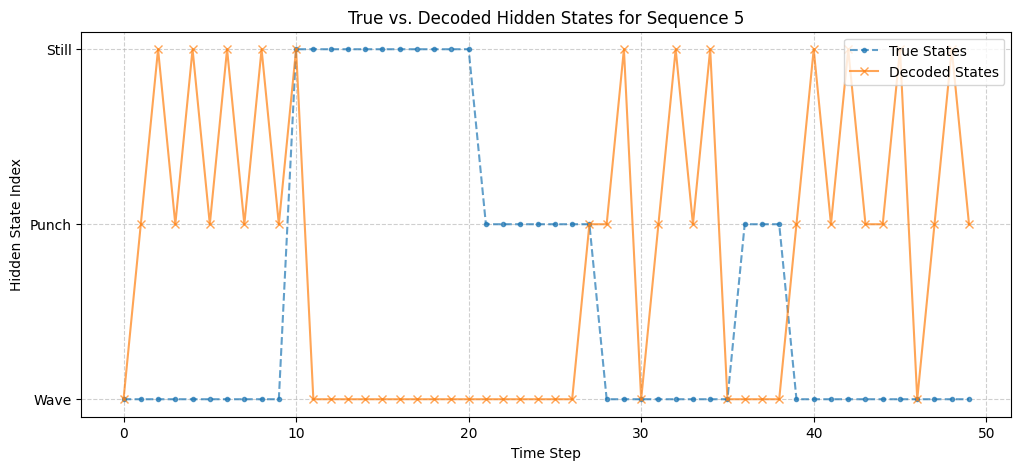

In [11]:
# --- Use the trained HMM to decode a new sequence ---
# Let's take one of the generated sequences and decode it
test_sequence_idx = 5
X_test_seq = all_observations[test_sequence_idx]
Z_test_true = all_hidden_states[test_sequence_idx]

print(f"\nDecoding test sequence {test_sequence_idx} (length {len(X_test_seq)})")
log_prob_decoded, decoded_gesture_states = model_gesture_learned.decode(X_test_seq,
                                                                        lengths=[len(X_test_seq)],
                                                                        algorithm="viterbi")

print(f"Decoded Hidden States (first 10): {decoded_gesture_states[:10]}")
print(f"True Hidden States (first 10):    {Z_test_true[:10]}")

# Evaluate decoding accuracy for this sequence
decoding_accuracy = np.mean(decoded_gesture_states == Z_test_true)
print(f"\nDecoding Accuracy for test sequence {test_sequence_idx}: {decoding_accuracy:.4f}")

# Plot true vs. decoded states for visual inspection
plt.figure(figsize=(12, 5))
plt.plot(Z_test_true, label='True States', marker='.', linestyle='--', alpha=0.7)
plt.plot(decoded_gesture_states, label='Decoded States', marker='x', linestyle='-', alpha=0.7)
plt.title(f'True vs. Decoded Hidden States for Sequence {test_sequence_idx}')
plt.xlabel('Time Step')
plt.ylabel('Hidden State Index')
plt.yticks(range(n_gestures), ['Wave', 'Punch', 'Still']) # Assuming mapping based on order
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Important Note: The learned states (0, 1, 2) by the HMM might not correspond
# directly to the 'true' state labels (0, 1, 2) due to permutation.
# A more robust evaluation would involve matching the learned states to true states
# using a mapping algorithm if true labels are known. For this lab, direct comparison is illustrative.

**Discussion Points:**
* How does the `GaussianHMM` differ from `MultinomialHMM` in terms of handling observation probabilities? When would you choose one over the other?
* Observe the learned means and covariances. Do they roughly align with your expectations based on how the synthetic data was generated for each gesture?
* What challenges might arise in a real-world gesture recognition system using HMMs (e.g., varying gesture speeds, different users, noise)?


### Part 4: Advanced Topics & Discussion

This section is for broader discussion and conceptual understanding, extending beyond direct coding.

**Discussion Topics:**
* **HMM Assumptions and Limitations:** Discuss the core assumptions of HMMs (Markov assumption, output independence) and how they impact real-world applicability.
* **Comparison with Recurrent Neural Networks (RNNs):** How do HMMs compare to RNNs (like LSTMs/GRUs) for sequential data modeling? When might you prefer one over the other?
* **Extensions of HMMs:** Briefly mention more advanced variants like Factorial HMMs, Hierarchical HMMs, and Coupled HMMs.
* **Applications Beyond Speech/NLP:** Explore diverse applications of HMMs in fields like bioinformatics, finance, and robotics.
* **Challenges in Real-world HMM Applications:** What are the practical difficulties encountered when deploying HMMs?


* **HMM Assumptions and Limitations:**

    HMMs operate on a few fundamental assumptions, which, while simplifying the model and enabling efficient algorithms, can also be their limitations in real-world scenarios:

    1.  **Markov Assumption (First-Order Markov Property):**  
        The probability of transitioning to the next hidden state depends *only* on the current hidden state, not on any preceding states:  
        $$ P(q_t \mid q_{t-1}, q_{t-2}, \ldots, q_1) = P(q_t \mid q_{t-1}) $$
        This "memoryless" property simplifies transitions but might not capture long-range dependencies in complex sequences.

    2.  **Output Independence Assumption:**  
        The probability of an observation depends *only* on the current hidden state that generated it, and is independent of all other observations and all other hidden states:  
        $$ P(O_t \mid q_t, q_{t-1}, \ldots, q_1, O_{t-1}, \ldots, O_1) = P(O_t \mid q_t) $$
        This is a strong assumption, as in many real-world phenomena, observations might be correlated over time or influence each other.

    3.  **Stationarity:**  
        The transition and emission probabilities are assumed to be constant over time. This means the underlying process doesn't change its behavior.

    4.  **Fixed Number of Hidden States:**  
        The number of hidden states must be chosen a priori. Determining the optimal number can be challenging.

    These assumptions can lead to HMMs struggling with:
      - Modeling long-range dependencies where events far in the past influence the current state.
      - Situations where observations are not conditionally independent (e.g., multiple concurrent events contributing to an observation).
      - Non-stationary processes where the underlying dynamics evolve over time.


* **Comparison with Recurrent Neural Networks (RNNs):**

    Both HMMs and RNNs (especially LSTMs/GRUs) are powerful tools for sequential data, but they differ significantly:

    - **Generative vs. Discriminative:**  
      HMMs are **generative models**. They model the joint probability distribution of observations and hidden states:  
      $$ P(O, Q) $$  
      and can be used to generate sequences.  
      RNNs are typically **discriminative models**, directly modeling the conditional probability of output given input:  
      $$ P(y \mid X) $$

    - **Assumptions:**  
      HMMs rely on strong independence and Markov assumptions.  
      RNNs, particularly LSTMs and GRUs, are designed to explicitly capture long-range dependencies in sequences, overcoming the Markov assumption limitation.

    - **Feature Engineering vs. Feature Learning:**  
      HMMs often require domain expertise to define appropriate features and choose the right type (Gaussian, Multinomial).  
      RNNs can learn complex features directly from raw sequential data, eliminating the need for manual feature engineering.

    - **Flexibility:**  
      RNNs are more flexible and can model highly complex, non-linear relationships in data that HMMs might struggle with due to their fixed probabilistic structure.

    - **Training:**  
      HMMs use algorithms like Baum-Welch (EM), which are guaranteed to converge to a local optimum.  
      RNNs use backpropagation through time (BPTT), which can be more complex to train (e.g., vanishing/exploding gradients).

    - **Interpretability:**  
      HMMs are generally more interpretable. Their state transitions and emission probabilities often have clear meanings related to the underlying process.  
      RNNs are often "black boxes."

    * **When to Prefer:**
        * **HMMs:** When you have a clear understanding of the underlying states, relatively short dependencies, a need for interpretability, or limited data. Good for tasks like basic speech recognition, bioinformatics sequence alignment, simple gesture recognition.
        * **RNNs:** When you have complex, long-range dependencies, large amounts of data, and don't need direct interpretability of hidden states (e.g., natural language processing, complex time series prediction, advanced speech recognition).

* **Extensions of HMMs:**
    To overcome some of their limitations, several HMM variants have been developed:
    * **Factorial HMMs:** Allow for multiple, independent sets of hidden states at each time step, capturing more complex relationships.
    * **Hierarchical HMMs (HHMMs):** Model hidden states at different levels of abstraction, where a parent state can generate a sequence of child states. Useful for hierarchical structures (e.g., in language or actions).
    * **Coupled HMMs (CHMMs):** Model multiple interacting observation sequences by allowing hidden states of different HMMs to influence each other. Used for modeling synchronized, interdependent processes.
    * **Explicit Duration HMMs:** Relax the implicit geometric duration distribution by explicitly modeling the probability distribution over the time spent in a state.
    * **Discriminative HMMs (e.g., Maximum Entropy HMMs, Conditional Random Fields - CRFs):** Combine the sequence modeling capabilities of HMMs with the discriminative power of models like logistic regression, directly modeling $P(Q|O)$ instead of the joint probability. CRFs are particularly popular as they overcome the output independence assumption.

* **Applications Beyond Speech/NLP:**
    While famously used in speech recognition and natural language processing, HMMs have found diverse applications:
    * **Bioinformatics:**
        * **Gene Finding:** Identifying protein-coding regions in DNA sequences.
        * **Sequence Alignment:** Aligning biological sequences (DNA, RNA, protein) to find similarities.
        * **Protein Structure Prediction:** Predicting secondary and tertiary protein structures.
    * **Finance:**
        * **Market Regime Detection:** Identifying hidden market states (e.g., bull, bear, volatile) from stock prices or trading volumes.
        * **Fraud Detection:** Detecting anomalous sequences of transactions.
    * **Robotics:**
        * **Robot Localization:** Estimating a robot's position based on sensor readings.
        * **Human-Robot Interaction:** Understanding human gestures or intentions.
    * **Environmental Monitoring:** Modeling climate patterns or pollution levels over time.
    * **Medical Diagnostics:** Analyzing sequences of patient symptoms or test results for disease diagnosis.
    * **Activity Recognition:** Identifying human activities from sensor data (e.g., accelerometer, gyroscope in wearables).

* **Challenges in Real-world HMM Applications:**
    * **Model Selection:** Determining the optimal number of hidden states (N) is often empirical and challenging.
    * **Initialization:** The Baum-Welch algorithm can converge to local optima, making proper initialization of parameters crucial. Multiple random initializations are often used.
    * **Computational Cost:** For very long sequences or a large number of hidden states, the algorithms (especially Baum-Welch) can be computationally intensive.
    * **Assumption Violations:** The strong Markov and output independence assumptions can limit performance when real-world data significantly deviates from these.
    * **Data Sparsity:** Estimating robust transition and emission probabilities requires sufficient data to cover all relevant state transitions and observations.
    * **Scalability:** While efficient for their complexity, scaling to extremely large vocabularies or very deep state structures can still be an issue.


---
  
<center>

<span style="color:#1f4e79">

Prepared By

**<span style="font-size:1.5em">Md. Atikuzzaman</span>**  
Lecturer  
Department of Computer Science and Engineering  
Green University of Bangladesh  
Email: atik@cse.green.edu.bd  

</span>
</center>

---
